## Data Collection

In [18]:
import numpy as np
import pandas as pd

#### Collecting OHLC data of Apple using the yfinance library

In [19]:
import yfinance as yf

symbol = 'AAPL'
start_date = '2015-01-01'
end_date = '2025-01-19'

stock_data = yf.download(symbol, start = start_date, end = end_date)

stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320433,24.789802,23.879981,24.778679,212818400
2015-01-05,23.635283,24.169162,23.448426,24.089080,257142000
2015-01-06,23.637520,23.897786,23.274926,23.699806,263188400
2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600
2015-01-08,24.889900,24.947738,24.180285,24.298185,237458000


## Data Preproccessing and Cleaning

#### Adding indicators as extra features to improve performance using the talib library

In [20]:
import talib as ta

# Extract individual columns from multi-level DataFrame
close_prices = stock_data[('Close', symbol)].to_numpy()
high_prices = stock_data[('High', symbol)].to_numpy()
low_prices = stock_data[('Low', symbol)].to_numpy()

# Adding MACD, RSI, SMA, EMA, and ADX indicators
stock_data['MACD'], stock_data['MACD_signal'], _ = ta.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
stock_data['RSI'] = ta.RSI(close_prices, timeperiod=14)
stock_data['SMA_20'] = ta.SMA(close_prices, timeperiod=20)
stock_data['EMA_20'] = ta.EMA(close_prices, timeperiod=20)
stock_data['ADX'] = ta.ADX(high_prices, low_prices, close_prices, timeperiod=14)

# Drop any rows with NaN values generated by the indicators
stock_data.dropna(inplace=True)

# Display the tail of the dataframe to check the new columns
stock_data.tail()


Price,Close,High,Low,Open,Volume,MACD,MACD_signal,RSI,SMA_20,EMA_20,ADX
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2025-01-13,234.142563,234.412271,229.467710,233.273523,49630700,-0.533319,2.107213,34.659192,248.327470,244.508009,30.663649
2025-01-14,233.023788,235.860666,232.214681,234.492175,39435300,-1.332718,1.419227,33.488062,247.594276,243.414274,30.551695
2025-01-15,237.608749,238.697564,234.172525,234.382301,39832000,-1.578089,0.819764,42.119736,247.081839,242.861367,29.690218
2025-01-16,228.009308,237.748600,227.779565,237.089336,71759100,-2.518114,0.152188,32.585009,245.944090,241.446885,29.858055
2025-01-17,229.727417,232.034878,228.229064,231.865066,68488300,-3.088848,-0.496019,35.403527,244.770381,240.330745,30.013904


In [21]:
df = stock_data

In [ ]:
# Dropping unecessary columns which mostly won't contribute to the model
df = df.drop(['Open', 'High', 'Low'], axis=1)
df.head()

Price,Close,Volume,MACD,MACD_signal,RSI,SMA_20,EMA_20,ADX
Ticker,AAPL,AAPL,,,,,,
Date,,,,,,,,
2015-02-20,28.920935,195793600,1.242212,1.124634,75.666545,26.942899,27.121826,36.603603
2015-02-23,29.702578,283896400,1.298209,1.159349,79.466635,27.171410,27.367612,38.622419
2015-02-24,29.517218,276912400,1.312500,1.189979,76.418860,27.389317,27.572336,40.580491
2015-02-25,28.762365,298846800,1.248523,1.201688,65.415843,27.613527,27.685672,40.587364
2015-02-26,29.126392,365150000,1.213210,1.203992,67.822014,27.787313,27.822884,39.816186


## Splitting Data into Training and Testing Sets

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# First split the RAW data before scaling
train_raw, test_raw = train_test_split(df, test_size=0.2, shuffle=False)

# Initialize scaler
scaler = MinMaxScaler()

# Fit ONLY on training data
scaled_train = scaler.fit_transform(train_raw)
scaled_test = scaler.transform(test_raw)

# Convert back to DataFrames (important for sequence creation)
train_df = pd.DataFrame(scaled_train, columns=df.columns, index=train_raw.index)
test_df = pd.DataFrame(scaled_test, columns=df.columns, index=test_raw.index)

train_df.head()

Price,Close,Volume,MACD,MACD_signal,RSI,SMA_20,EMA_20,ADX
Ticker,AAPL,AAPL,,,,,,
Date,,,,,,,,
2015-02-20,0.052125,0.261718,0.559061,0.546670,0.784269,0.035969,0.034938,0.445561
2015-02-23,0.057065,0.405294,0.563099,0.549462,0.838817,0.037474,0.036577,0.478898
2015-02-24,0.055894,0.393913,0.564129,0.551926,0.795068,0.038908,0.037942,0.511232
2015-02-25,0.051122,0.429658,0.559516,0.552867,0.637127,0.040385,0.038698,0.511346
2015-02-26,0.053423,0.537709,0.556970,0.553053,0.671666,0.041529,0.039613,0.498611


In [24]:
sequence_length = 30

# Fucntion to create sequences
def create_sequences(data, sequence_length, stride=5):
    sequences = []
    for i in range(0, len(data) - sequence_length, stride):
        seq = data.iloc[i : i + sequence_length].values
        sequences.append(seq)
    return np.array(sequences)


train_sequences = create_sequences(train_df, sequence_length)
test_sequences = create_sequences(test_df, sequence_length)

# Assign directly to X_train/X_test
X_train = train_sequences
X_test = test_sequences

print("Training sequence shape:", X_train.shape)
print("Testing sequence shape:", X_test.shape)

Training sequence shape: (393, 30, 8)
Testing sequence shape: (94, 30, 8)


## Building LSTM Model

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_lstm_autoencoder(sequence_length, num_features):
    model = models.Sequential([
        # Encoder
        layers.LSTM(64, return_sequences=True, input_shape=(sequence_length, num_features)),
        layers.Dropout(0.2),
        layers.LSTM(32, return_sequences=False),
        # Bottleneck
        layers.RepeatVector(sequence_length),
        # Decoder
        layers.LSTM(32, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(64, return_sequences=True),
        # Output
        layers.TimeDistributed(layers.Dense(num_features))
    ])
    return model

sequence_length = 30
num_features = X_train.shape[2] 

# Build the model
autoencoder = build_lstm_autoencoder(sequence_length, num_features)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Summarize the model
autoencoder.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 30, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 30, 8)          │           520 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,776 (253.03 KB)

 Trainable params: 64,776 (253.03 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training 

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 50
batch_size = 64

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = autoencoder.fit(
    X_train, X_train,  
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping]
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.1750 - val_loss: 0.3200
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0725 - val_loss: 0.2174
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0520 - val_loss: 0.1419
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0358 - val_loss: 0.0846
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0301 - val_loss: 0.0895
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0274 - val_loss: 0.0829
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0252 - val_loss: 0.0731
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0228 - val_loss: 0.0781
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0206 - val_loss: 0.0677
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0189 - val_loss: 0.0633
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0176 - val_loss: 0.0556
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0168 - val_loss: 0.0538


## Data Visualization

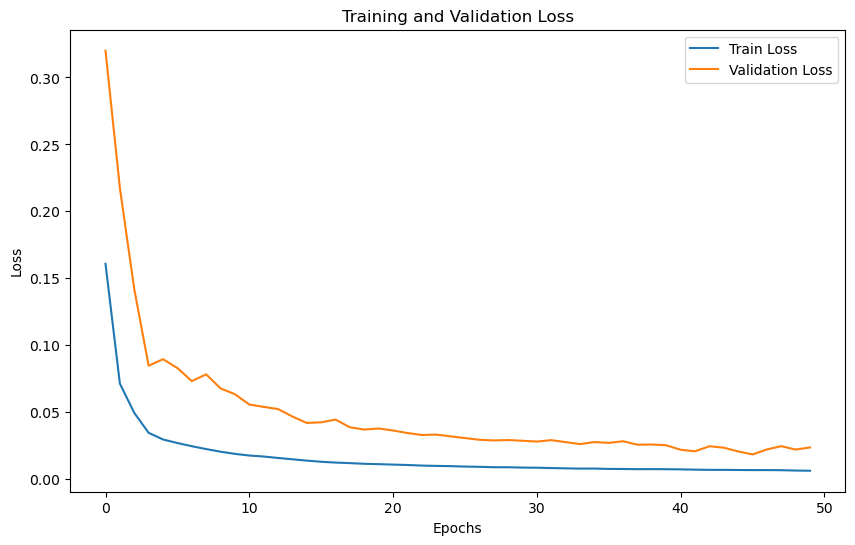

In [27]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Threshold: 0.15826739527358163
Number of anomalies detected: 98
Sample anomaly dates: DatetimeIndex(['2023-04-05', '2023-04-06', '2023-04-10', '2023-04-11',
               '2023-04-11', '2023-04-12', '2023-04-13', '2023-04-14',
               '2023-04-14', '2023-04-17'],
              dtype='datetime64[ns]', name='Date', freq=None)


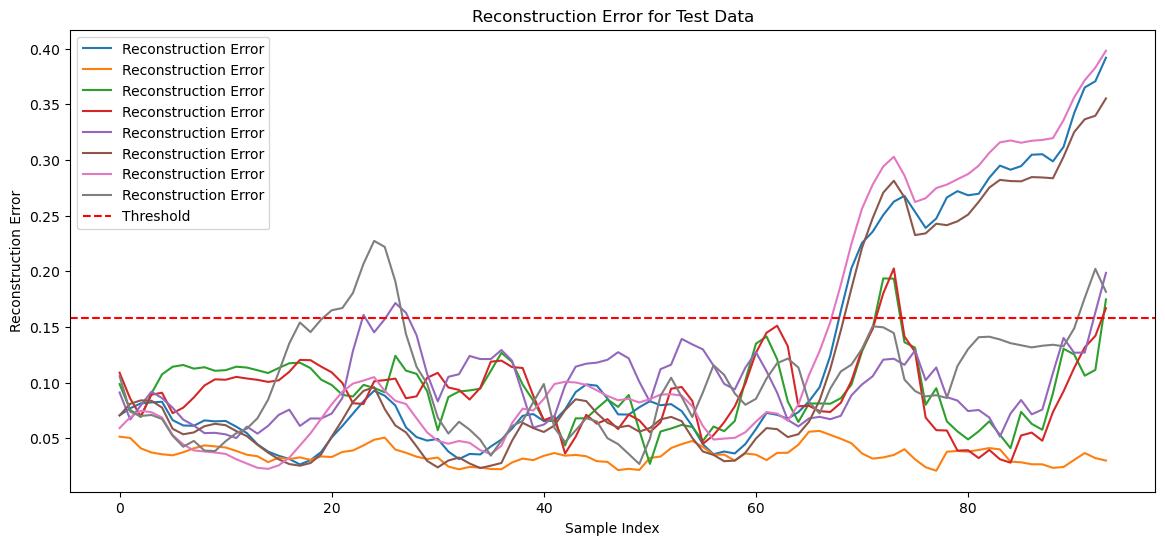

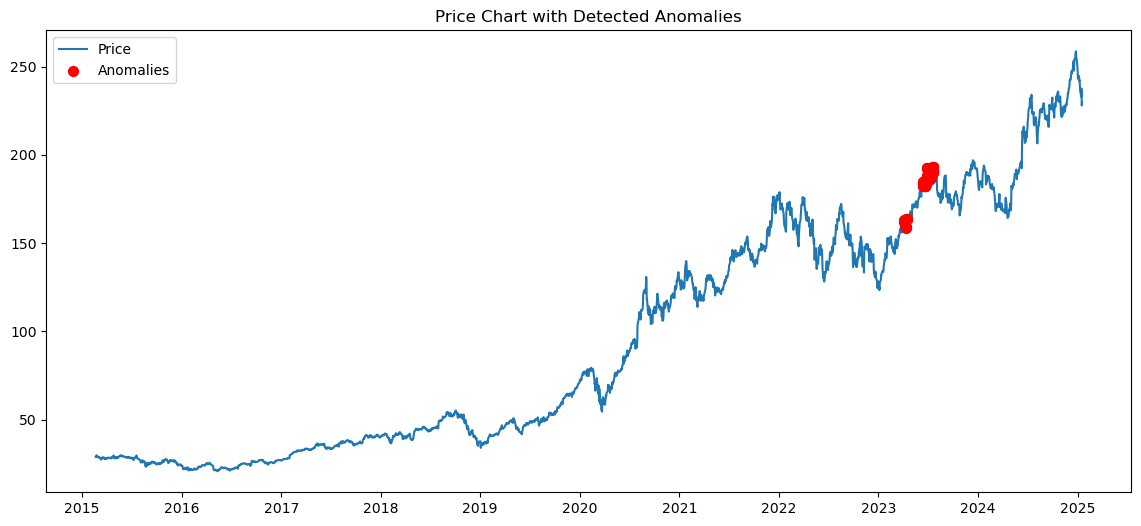

In [28]:
# Calculate reconstruction errors
train_reconstructed = autoencoder.predict(X_train, verbose=0)
test_reconstructed = autoencoder.predict(X_test, verbose=0)

train_error = np.mean(np.abs(train_reconstructed - X_train), axis=1)
test_error = np.mean(np.abs(test_reconstructed - X_test), axis=1)


threshold = np.percentile(train_error, 99)  
anomalies = test_error > threshold

print(f"Threshold: {threshold}")
print(f"Number of anomalies detected: {np.sum(anomalies)}")

anomaly_indices = np.where(anomalies)[0]
anomaly_dates = test_df.index[anomaly_indices + sequence_length]

print("Sample anomaly dates:", anomaly_dates[:10])

# Plot reconstruction errors
plt.figure(figsize=(14, 6))
plt.plot(test_error, label='Reconstruction Error')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for Test Data')
plt.legend()
plt.show()

# Plot price with anomalies
plt.figure(figsize=(14, 6))
plt.plot(stock_data['Close'], label='Price')
plt.scatter(anomaly_dates, stock_data.loc[anomaly_dates, 'Close'], 
            color='red', s=50, zorder=5, label='Anomalies')
plt.title('Price Chart with Detected Anomalies')
plt.legend()
plt.show()